# Out-of-school Reasons And Impact. 
**Content**<ul>
    <li>[Create Functions](#create-functions)</li>
    <li>[Data Wrangling](#Data-Wrangling)</li>
        <ul>
            <li>Gathering</li>
            <li>Assessing</li>
            <li>Cleaning data</li>
        </ul>    
    <li>[ Exploratory Data Analysis](#Exploratory-Data-Analysis)</li>
</ul>



## Create Functions
Create functions for reuse to avoid repetitive code

In [ ]:
# Import the required packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import statistics as stat
%matplotlib inline

In [ ]:
def change_col_name(df):
    """change columns names to lowercase and replace spaces with underscore."""
    
    cols = df.columns
    new_name = [col.lower().replace(" ","_") for col in cols ]
    df.columns = new_name 
    
    # checking the result
    print(df.columns)
    print("\nColumn names have been updated successfully.")
    

In [ ]:
def checking(df):
    """ check the file (shape, missing values, data types, unique values, duplicates)."""
    
    # check data (rows, columns) values
    print("shape of file:\n {}\n\n".format(df.shape))
    
    # check NaN valus
    print("NaN values in the file:\n {}\n\n".format(df.info()))
          
    # check columns data types
    print("columns data types in the file:\n {}\n\n".format(df.dtypes))
          
    # check number of unique values in each column
    print("number of unique values in the file:\n {}\n\n".format(df.nunique())) 
          
    # check number of duplicates values 
    print("number of duplicates values in the file:\n {}\n\n".format(df.duplicated().sum()))

In [ ]:
def add_id_col(df):
    """creat id column from tow columns country_code and years. """
    
    df['cuntry_year_id'] = df['country_code'] + "_" + df['years']
    
    # checking the result
    print(df['cuntry_year_id'].head())
    print("\ncountry_year_id column is created successfully.")

In [ ]:
def drop_NaN(df, col):
    """drop NaN values based on specific column."""
    
    df.dropna(subset=col, inplace=True)
    
    # checking the result
    print("missing values in df columns:\n",df.isnull().sum())
    print('\nThe missing value has been successfully deleted.')

In [ ]:
def change_col_dtype(df, cols_list, list_types):
    """ change column data type
    Arg:
        df: a string of data frame name  
        cols_list : list of columns that we want to change it's type
        list_types : list of new types of the columns
    """
    i = 0
    for col in cols_list:
        df[col] = df[col].astype(list_types[i])
        i += 1
        
    # checking the result 
    print(df.dtypes)
    print("\nColumns data type changed successfully.")    

In [ ]:
def merge_files(df1, df2, how):
    """
    merge files together.
    
    arg:
        df1: a string of left data frame name
        df2: a strin of right data frame name
        how: a string of join's type
        
    output: merged data frame
    """
    
    merged_df = df1.merge(df2, how=how)
    
    print("\nThe files have been merged successfully.")
   
    return merged_df

In [ ]:
def drop_cols(df, cols_list):
    """ 
    delete not needed columns
    args:
        df: a string of data frame name that we will drop columns from  
        cols_list : list of columns names we will delete
 
    """
    
    df.drop(cols_list, axis=1, inplace=True)
    
    # checking the result
    print(df.columns)
    print("\nColumns that we do not need have been successfully deleted.")
    

In [ ]:
def to_long_format(df, index, value_name=None):
    """
    change file format from wide to longe 
    
    args:
        df : a string of data frame name that will be converted to longe.
        index : int to select the columns.
        value_name : the column name that will containe the values
        
    output: long format data frame.
    """
    
    cols = list(df.columns)
    if value_name == None:
        value_name = df["indicator_name"][0].lower().replace(" ","_").replace(",","")
        
    df = pd.melt(df, id_vars=cols[:index], value_vars=cols[index:], value_name=value_name, var_name="years")
   
    print("\nThe file has been converted from wide format to long format successfully.")
    return df

[GO UP](#out-of-school-reasons-and-impact)

## Data Wrangling

**uplode country_codes file**

In [ ]:
# I'll use this file in creating a new column 
# that I'll use as the primary key in the files to be able to join them together

cols = ['country_name','country_code']
country_code_df = pd.read_csv("country_codes.csv",skiprows=1,names=cols)

country_code_df.head(1)

,country_name,country_code
0,Aruba,ABW


In [ ]:
# check unique values in country_code_df columns

country_code_df.nunique()

country_name    266
country_code    266
dtype: int64

**Out school female files checking and cleaning**

In [ ]:
# upload the data
# get columns we need only
# Skip rows we don't need
columns = ['Country Name', 'Indicator Name',"Country Code",'1960', '1961', '1962', '1963','1964',
           '1965', '1966', '1967', '1968','1969', '1970', '1971', '1972', '1973', '1974', '1975',
           '1976', '1977','1978','1979', '1980', '1981', '1982', '1983','1984', '1985', '1986',
           '1987', '1988', '1989', '1990', '1991', '1992','1993', '1994', '1995','1996', '1997',
           '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008',
           '2009', '2010', '2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019',
           '2020', '2021']

out_school_female = pd.read_csv("Children out of school, primary, female.csv", header=2, usecols=columns)

# File upload check
out_school_female.head(1)

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Children out of school, primary, female",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# change columns name to follow best practices and be able to use dot notation 

change_col_name(out_school_female)

Index(['country_name', 'country_code', 'indicator_name', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

Column names have been updated successfully.


In [ ]:
# change file formate to long 

out_school_female = to_long_format(out_school_female, 3)
out_school_female.head()


The file has been converted from wide format to long format successfully.


,country_name,country_code,indicator_name,years,children_out_of_school_primary_female
0,Aruba,ABW,"Children out of school, primary, female",1960,NaN
1,Africa Eastern and Southern,AFE,"Children out of school, primary, female",1960,NaN
2,Afghanistan,AFG,"Children out of school, primary, female",1960,NaN
3,Africa Western and Central,AFW,"Children out of school, primary, female",1960,NaN
4,Angola,AGO,"Children out of school, primary, female",1960,NaN


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(out_school_female)

shape of file:
 (16492, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country_name                           16492 non-null  object 
 1   country_code                           16492 non-null  object 
 2   indicator_name                         16492 non-null  object 
 3   years                                  16492 non-null  object 
 4   children_out_of_school_primary_female  3394 non-null   float64
dtypes: float64(1), object(4)
memory usage: 644.3+ KB
NaN values in the file:
 None


columns data types in the file:
 country_name                              object
country_code                              object
indicator_name                            object
years                                     object
children_out_of_school_primary_female    float64
dtype: object


number 

In [ ]:
# add cuntry_year_id to use as primary key when join files 

add_id_col(out_school_female)

0    ABW_1960
1    AFE_1960
2    AFG_1960
3    AFW_1960
4    AGO_1960
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# delet 'indicator_name','country_code' columns from out_school_female file

drop_cols(out_school_female, ['indicator_name','country_code'] )

Index(['country_name', 'years', 'children_out_of_school_primary_female',
       'cuntry_year_id'],
      dtype='object')

Columns that we do not need have been successfully deleted.


In [ ]:
# drop nan rows based on children_out_of_school_primary_female column

drop_NaN(out_school_female, 'children_out_of_school_primary_female')

missing values in df columns:
 country_name                             0
years                                    0
children_out_of_school_primary_female    0
cuntry_year_id                           0
dtype: int64

The missing value has been successfully deleted.


In [ ]:
# change num_children_out_of_school_primary column data type to int

change_col_dtype(out_school_female,['children_out_of_school_primary_female'], [int])

country_name                             object
years                                    object
children_out_of_school_primary_female     int32
cuntry_year_id                           object
dtype: object

Columns data type changed successfully.


**second out_school_male file checking and cleaning**

In [ ]:
# upload the data
# get columns we need only
# Skip rows we don't need

columns = ['Country Name', 'Indicator Name','Country Code','1960', '1961', '1962', '1963','1964',
           '1965', '1966', '1967', '1968','1969', '1970', '1971', '1972', '1973', '1974', '1975',
           '1976', '1977','1978','1979', '1980', '1981', '1982', '1983','1984', '1985', '1986',
           '1987', '1988', '1989', '1990', '1991', '1992','1993', '1994', '1995','1996', '1997',
           '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008',
           '2009', '2010', '2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019',
           '2020', '2021']

out_school_male = pd.read_csv("Children out of school, primary, male.csv", header=2, usecols=columns)
out_school_male.head(1)

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Children out of school, primary, male",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# change columns name  

change_col_name(out_school_male)

Index(['country_name', 'country_code', 'indicator_name', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

Column names have been updated successfully.


In [ ]:
# change file formate to long 

out_school_male = to_long_format(out_school_male,3)
out_school_male.head()


The file has been converted from wide format to long format successfully.


,country_name,country_code,indicator_name,years,children_out_of_school_primary_male
0,Aruba,ABW,"Children out of school, primary, male",1960,NaN
1,Africa Eastern and Southern,AFE,"Children out of school, primary, male",1960,NaN
2,Afghanistan,AFG,"Children out of school, primary, male",1960,NaN
3,Africa Western and Central,AFW,"Children out of school, primary, male",1960,NaN
4,Angola,AGO,"Children out of school, primary, male",1960,NaN


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(out_school_male)

shape of file:
 (16492, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country_name                         16492 non-null  object 
 1   country_code                         16492 non-null  object 
 2   indicator_name                       16492 non-null  object 
 3   years                                16492 non-null  object 
 4   children_out_of_school_primary_male  3393 non-null   float64
dtypes: float64(1), object(4)
memory usage: 644.3+ KB
NaN values in the file:
 None


columns data types in the file:
 country_name                            object
country_code                            object
indicator_name                          object
years                                   object
children_out_of_school_primary_male    float64
dtype: object


number of unique values in the 

In [ ]:
# add cuntry_year_id to use as primary key when join files 

add_id_col(out_school_male)

0    ABW_1960
1    AFE_1960
2    AFG_1960
3    AFW_1960
4    AGO_1960
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# delet 'indicator_name','country_code' columns from out_school_male file

drop_cols(out_school_male, ['indicator_name','country_code'])

Index(['country_name', 'years', 'children_out_of_school_primary_male',
       'cuntry_year_id'],
      dtype='object')

Columns that we do not need have been successfully deleted.


In [ ]:
# drop nan rows based on children_out_of_school_primary_male column

drop_NaN(out_school_male, "children_out_of_school_primary_male")

missing values in df columns:
 country_name                           0
years                                  0
children_out_of_school_primary_male    0
cuntry_year_id                         0
dtype: int64

The missing value has been successfully deleted.


In [ ]:
# change children_out_of_school_primary_male column data type to int

change_col_dtype(out_school_male, ['children_out_of_school_primary_male'], [int])

country_name                           object
years                                  object
children_out_of_school_primary_male     int32
cuntry_year_id                         object
dtype: object

Columns data type changed successfully.


In [ ]:
out_school_female.head(1)

,country_name,years,children_out_of_school_primary_female,cuntry_year_id
2669,Argentina,1970,61145,ARG_1970


In [ ]:
out_school_male.head(1)

,country_name,years,children_out_of_school_primary_male,cuntry_year_id
2669,Argentina,1970,94757,ARG_1970


In [ ]:
# merge out_school_female and out_school_male togather 
# to creat new column total for number male and number female out-of-school

out_school = merge_files(out_school_female , out_school_male, 'inner')
out_school.head(1)


The files have been merged successfully.


,country_name,years,children_out_of_school_primary_female,cuntry_year_id,children_out_of_school_primary_male
0,Argentina,1970,61145,ARG_1970,94757


In [ ]:
# create a total column that has the total of out-school children from both genders

out_school['total']= out_school['children_out_of_school_primary_male'] + out_school['children_out_of_school_primary_female']
out_school.head(1)

,country_name,years,children_out_of_school_primary_female,cuntry_year_id,children_out_of_school_primary_male,total
0,Argentina,1970,61145,ARG_1970,94757,155902


**Income file checking and cleaning**

In [ ]:
# upload the data

income_columns = ["country",'1960', '1961', '1962', '1963', '1964','1965', '1966', '1967', '1968','1969', 
           '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978','1979', '1980', '1981', '1982', '1983',
           '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992','1993', '1994', '1995','1996', '1997',
           '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011',
           '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

income = pd.read_csv("income_per_person.csv",usecols=income_columns)

# change country column name to country_name to be able to join the df with country_code_df
income.rename(columns={"country":"country_name"},inplace=True)

In [ ]:
# change file format from wide to long format

income = to_long_format(income, 1, "income_per_person")
income.head()


The file has been converted from wide format to long format successfully.


,country_name,years,income_per_person
0,Afghanistan,1960,1540
1,Angola,1960,2320
2,Albania,1960,2690
3,Andorra,1960,17.2k
4,United Arab Emirates,1960,41.6k


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(income)

shape of file:
 (12090, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12090 entries, 0 to 12089
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country_name       12090 non-null  object
 1   years              12090 non-null  object
 2   income_per_person  12090 non-null  object
dtypes: object(3)
memory usage: 283.5+ KB
NaN values in the file:
 None


columns data types in the file:
 country_name         object
years                object
income_per_person    object
dtype: object


number of unique values in the file:
 country_name          195
years                  62
income_per_person    1888
dtype: int64


number of duplicates values in the file:
 0




In [ ]:
# marge the income file with country_code_df to be able
# to creat new column id with country_code and year

income = merge_files(income, country_code_df , "left"  )


The files have been merged successfully.


In [ ]:
# add cuntry_year_id to use as primary key when join files 

add_id_col(income)

0    AFG_1960
1    AGO_1960
2    ALB_1960
3    AND_1960
4    ARE_1960
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# When viewing this table, we noticed in the income_per_person column, 
# that some rows have the letter K at the end of them, and others do not,
# So we will modify the format of the values so that all values are the same format
# And be able to change the data type of the column

print(income[income['income_per_person'].str.endswith('k',na=False)].shape)
income[income['income_per_person'].str.endswith('k',na=False)].head()

(4859, 5)


,country_name,years,income_per_person,country_code,cuntry_year_id
3,Andorra,1960,17.2k,AND,AND_1960
4,United Arab Emirates,1960,41.6k,ARE,ARE_1960
5,Argentina,1960,10.3k,ARG,ARG_1960
8,Australia,1960,16.3k,AUS,AUS_1960
9,Austria,1960,12.1k,AUT,AUT_1960


In [ ]:
# change some rows' format by removing the K letter
# and multiplying the value by 1000 in income_per_person column

endwith_K= income[income['income_per_person'].str.endswith('k',na=False)]

for val in endwith_K.index:
    income['income_per_person'][val] = float(income['income_per_person'][val].replace("k",""))*1000
    

In [ ]:
# check the results

income[income['income_per_person'].str.endswith('k',na=False)]

,country_name,years,income_per_person,country_code,cuntry_year_id


In [ ]:
# change income_per_person data type to float

change_col_dtype(income,["income_per_person"],[float])

country_name          object
years                 object
income_per_person    float64
country_code          object
cuntry_year_id        object
dtype: object

Columns data type changed successfully.


**Child labor file checking and cleaning**

In [ ]:
# upload the data
columns = ['Country Name', 'Indicator Name','1960', '1961', '1962', '1963', '1964','1965', '1966', '1967', '1968','1969', 
           '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978','1979', '1980', '1981', '1982', '1983',
           '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992','1993', '1994', '1995','1996', '1997',
           '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011',
           '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

child_labor = pd.read_csv("child_labor.csv", header=2,usecols=columns)
child_labor.head(1)

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,"Children in employment, total (% of children a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# change columns name  

change_col_name(child_labor)

Index(['country_name', 'indicator_name', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

Column names have been updated successfully.


In [ ]:
# change file format from wide to long format

child_labor = to_long_format(child_labor, 2, "percentage_child_labor" )
child_labor.head()


The file has been converted from wide format to long format successfully.


,country_name,indicator_name,years,percentage_child_labor
0,Aruba,"Children in employment, total (% of children a...",1960,NaN
1,Africa Eastern and Southern,"Children in employment, total (% of children a...",1960,NaN
2,Afghanistan,"Children in employment, total (% of children a...",1960,NaN
3,Africa Western and Central,"Children in employment, total (% of children a...",1960,NaN
4,Angola,"Children in employment, total (% of children a...",1960,NaN


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(child_labor)

shape of file:
 (16492, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_name            16492 non-null  object 
 1   indicator_name          16492 non-null  object 
 2   years                   16492 non-null  object 
 3   percentage_child_labor  281 non-null    float64
dtypes: float64(1), object(3)
memory usage: 515.5+ KB
NaN values in the file:
 None


columns data types in the file:
 country_name               object
indicator_name             object
years                      object
percentage_child_labor    float64
dtype: object


number of unique values in the file:
 country_name              266
indicator_name              1
years                      62
percentage_child_labor    241
dtype: int64


number of duplicates values in the file:
 0




In [ ]:
# marge the child_labor file with country_code_df to be able
# to creat new column id with country_code and year

child_labor = merge_files(child_labor, country_code_df, "left")
child_labor.head(1)


The files have been merged successfully.


,country_name,indicator_name,years,percentage_child_labor,country_code
0,Aruba,"Children in employment, total (% of children a...",1960,NaN,ABW


In [ ]:
# add cuntry_year_id to use as primary key when join files 

add_id_col(child_labor)

0    ABW_1960
1    AFE_1960
2    AFG_1960
3    AFW_1960
4    AGO_1960
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# delet 'indicator_name' columns from child_labor file

drop_cols(child_labor,['indicator_name'] )

Index(['country_name', 'years', 'percentage_child_labor', 'country_code',
       'cuntry_year_id'],
      dtype='object')

Columns that we do not need have been successfully deleted.


In [ ]:
# drop nan rows based on persentage_child_labor column

drop_NaN(child_labor, 'percentage_child_labor')

missing values in df columns:
 country_name              0
years                     0
percentage_child_labor    0
country_code              0
cuntry_year_id            0
dtype: int64

The missing value has been successfully deleted.


In [ ]:
child_labor.head()

,country_name,years,percentage_child_labor,country_code,cuntry_year_id
9129,Guinea,1994,48.3,GIN,GIN_1994
9696,Kazakhstan,1996,29.7,KAZ,KAZ_1996
9741,Mozambique,1996,1.8,MOZ,MOZ_1996
10230,Kyrgyz Republic,1998,8.6,KGZ,KGZ_1998
10495,Kenya,1999,6.7,KEN,KEN_1999


**Literacy rate files checking and cleaning**

In [ ]:
# upload the data

columns = ['Country Name','Country Code', 'Indicator Name','1960', '1961', '1962', '1963', '1964','1965', '1966', '1967', '1968','1969', 
           '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978','1979', '1980', '1981', '1982', '1983',
           '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992','1993', '1994', '1995','1996', '1997',
           '1998', '1999', '2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011',
           '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

literacy = pd.read_csv("Literacy rate, adult total % of people ages 15 and above.csv", header=2, usecols=columns)
literacy.head(1)

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Literacy rate, adult total (% of people ages 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.807419,NaN,97.989998,NaN


In [ ]:
# change column name

change_col_name(literacy)

Index(['country_name', 'country_code', 'indicator_name', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

Column names have been updated successfully.


In [ ]:
# change file format from wide to longe fromat

literacy = to_long_format(literacy, 3, "literacy_rate")
literacy.head()


The file has been converted from wide format to long format successfully.


,country_name,country_code,indicator_name,years,literacy_rate
0,Aruba,ABW,"Literacy rate, adult total (% of people ages 1...",1960,NaN
1,Africa Eastern and Southern,AFE,"Literacy rate, adult total (% of people ages 1...",1960,NaN
2,Afghanistan,AFG,"Literacy rate, adult total (% of people ages 1...",1960,NaN
3,Africa Western and Central,AFW,"Literacy rate, adult total (% of people ages 1...",1960,NaN
4,Angola,AGO,"Literacy rate, adult total (% of people ages 1...",1960,NaN


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(literacy)

shape of file:
 (16492, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    16492 non-null  object 
 1   country_code    16492 non-null  object 
 2   indicator_name  16492 non-null  object 
 3   years           16492 non-null  object 
 4   literacy_rate   2791 non-null   float64
dtypes: float64(1), object(4)
memory usage: 644.3+ KB
NaN values in the file:
 None


columns data types in the file:
 country_name       object
country_code       object
indicator_name     object
years              object
literacy_rate     float64
dtype: object


number of unique values in the file:
 country_name       266
country_code       266
indicator_name       1
years               62
literacy_rate     2676
dtype: int64


number of duplicates values in the file:
 0




In [ ]:
# add cuntry_year_id to use as primary key when 

add_id_col(literacy)

0    ABW_1960
1    AFE_1960
2    AFG_1960
3    AFW_1960
4    AGO_1960
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# delet 'indicator_name' columns from literacy file

drop_cols(literacy, ['indicator_name'])

Index(['country_name', 'country_code', 'years', 'literacy_rate',
       'cuntry_year_id'],
      dtype='object')

Columns that we do not need have been successfully deleted.


In [ ]:
# drop nan rows based on literacy_rate column

drop_NaN(literacy, 'literacy_rate')

missing values in df columns:
 country_name      0
country_code      0
years             0
literacy_rate     0
cuntry_year_id    0
dtype: int64

The missing value has been successfully deleted.


**unemployment with basic education files checking and cleaning**

In [ ]:
# upload the data
unemp_basic_educ = pd.read_csv("unemployment_with_baisc_education.csv")

# change country column name to country_name to be able to join the df with country_code_df
unemp_basic_educ.rename(columns={"country":"country_name"}, inplace=True)
unemp_basic_educ.head(1)

,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.38,NaN,NaN,12.3,NaN,NaN,11.1,NaN


In [ ]:
# change file format from wide to longe fromat

unemp_basic_educ = to_long_format(unemp_basic_educ, 1, "unemp_basic_education")
unemp_basic_educ.head(1)


The file has been converted from wide format to long format successfully.


,country_name,years,unemp_basic_education
0,Afghanistan,1990,NaN


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(unemp_basic_educ)

shape of file:
 (5792, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           5792 non-null   object 
 1   years                  5792 non-null   object 
 2   unemp_basic_education  1971 non-null   float64
dtypes: float64(1), object(2)
memory usage: 135.9+ KB
NaN values in the file:
 None


columns data types in the file:
 country_name              object
years                     object
unemp_basic_education    float64
dtype: object


number of unique values in the file:
 country_name             181
years                     32
unemp_basic_education    895
dtype: int64


number of duplicates values in the file:
 0




In [ ]:
# marge the unemp_basic_educ file with country_code_df to be able
# to creat new column id with country_code and year

unemp_basic_educ = merge_files(unemp_basic_educ, country_code_df, "left")


The files have been merged successfully.


In [ ]:
# add cuntry_year_id to use as primary key when 

add_id_col(unemp_basic_educ)

0    AFG_1990
1    AGO_1990
2    ALB_1990
3    ARE_1990
4    ARG_1990
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# drop nan rows based on unemp_basic_education column

drop_NaN(unemp_basic_educ, 'unemp_basic_education')

missing values in df columns:
 country_name               0
years                      0
unemp_basic_education      0
country_code             209
cuntry_year_id           209
dtype: int64

The missing value has been successfully deleted.


In [ ]:
# change unemp_basic_education data type to float

change_col_dtype(unemp_basic_educ, ['unemp_basic_education'], [float])

country_name              object
years                     object
unemp_basic_education    float64
country_code              object
cuntry_year_id            object
dtype: object

Columns data type changed successfully.


##### marraige files checking and cleaning
<li>sp_m15_women</li>
<li>sp_m18_women</li>
<li>age_at_1st_marriage_women</li>

In [ ]:
# upload the data
sp_m15_women = pd.read_csv("sp_m15_women.csv")

# change country column name to country_name to be able to join the df with country_code_df
sp_m15_women.rename(columns={"country":"country_name"}, inplace=True)
sp_m15_women.head(1)

,country_name,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.8,NaN,4.2,NaN,NaN,NaN


In [ ]:
# change file format from wide to longe fromat

sp_m15_women = to_long_format(sp_m15_women, 1,"women_FM15" )
sp_m15_women.head()


The file has been converted from wide format to long format successfully.


,country_name,years,women_FM15
0,Afghanistan,1985,NaN
1,Angola,1985,NaN
2,Albania,1985,NaN
3,Armenia,1985,NaN
4,Azerbaijan,1985,NaN


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(sp_m15_women)

shape of file:
 (4644, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  4644 non-null   object 
 1   years         4644 non-null   object 
 2   women_FM15    438 non-null    float64
dtypes: float64(1), object(2)
memory usage: 109.0+ KB
NaN values in the file:
 None


columns data types in the file:
 country_name     object
years            object
women_FM15      float64
dtype: object


number of unique values in the file:
 country_name    129
years            36
women_FM15      195
dtype: int64


number of duplicates values in the file:
 0




In [ ]:
# marge the sp_m15_women file with country_code_df to be able
# to creat new column id with country_code and year

sp_m15_women = merge_files(sp_m15_women, country_code_df, "left")
sp_m15_women.head(1)


The files have been merged successfully.


,country_name,years,women_FM15,country_code
0,Afghanistan,1985,NaN,AFG


In [ ]:
# add cuntry_year_id to use as primary key when 

add_id_col(sp_m15_women)

0    AFG_1985
1    AGO_1985
2    ALB_1985
3    ARM_1985
4    AZE_1985
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# drop nan rows based on women_FM15 column

drop_NaN(sp_m15_women, 'women_FM15')

missing values in df columns:
 country_name       0
years              0
women_FM15         0
country_code      29
cuntry_year_id    29
dtype: int64

The missing value has been successfully deleted.


**sp_m18_women file checking and cleaning**

In [ ]:
# uplode data 
sp_m18_women = pd.read_csv("sp_m18_ women.csv")

# change country column name to country_name to be able to join the df with country_code_df
sp_m18_women.rename(columns={"country":"country_name"}, inplace=True)
sp_m18_women.head(1)

,country_name,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.4,NaN,NaN,32.8,34.8,NaN,28.3,NaN,NaN,NaN


In [ ]:
# change file format from wide to longe fromat

sp_m18_women = to_long_format(sp_m18_women, 1, "women_FM18" )
sp_m18_women.head()


The file has been converted from wide format to long format successfully.


,country_name,years,women_FM18
0,Afghanistan,1985,NaN
1,Angola,1985,NaN
2,Albania,1985,NaN
3,Armenia,1985,NaN
4,Azerbaijan,1985,NaN


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(sp_m18_women)

shape of file:
 (4752, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  4752 non-null   object 
 1   years         4752 non-null   object 
 2   women_FM18    528 non-null    float64
dtypes: float64(1), object(2)
memory usage: 111.5+ KB
NaN values in the file:
 None


columns data types in the file:
 country_name     object
years            object
women_FM18      float64
dtype: object


number of unique values in the file:
 country_name    132
years            36
women_FM18      352
dtype: int64


number of duplicates values in the file:
 0




In [ ]:
# marge the sp_m18_women file with country_code_df to be able
# to creat new column id with country_code and year

sp_m18_women = merge_files(sp_m18_women, country_code_df, "left")
sp_m18_women.head(1)


The files have been merged successfully.


,country_name,years,women_FM18,country_code
0,Afghanistan,1985,NaN,AFG


In [ ]:
# add cuntry_year_id to use as primary key when 

add_id_col(sp_m18_women)

0    AFG_1985
1    AGO_1985
2    ALB_1985
3    ARM_1985
4    AZE_1985
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# drop nan rows based on women_FM18 column

drop_NaN(sp_m18_women, 'women_FM18')

missing values in df columns:
 country_name       0
years              0
women_FM18         0
country_code      36
cuntry_year_id    36
dtype: int64

The missing value has been successfully deleted.


In [ ]:
# merge sp_m15_women, sp_m18_women files to Know the total of early marriage 
sp_women = merge_files(sp_m15_women, sp_m18_women, 'inner')

# creat new column for total marriage 
sp_women['total_sp_women']= sp_women['women_FM15'] + sp_women['women_FM18']
sp_women.head(1)


The files have been merged successfully.


,country_name,years,women_FM15,country_code,cuntry_year_id,women_FM18,total_sp_women
0,El Salvador,1985,6.2,SLV,SLV_1985,37.7,43.9


**age_at_1st_marriage_women file checking and cleaning**

In [ ]:
# uplode data
age_1st_marr_women = pd.read_csv("age_at_1st_marriage_women.csv")

# change country column name to country_name to be able to join the df with country_code_df
age_1st_marr_women.rename(columns={"country":"country_name"}, inplace=True)
age_1st_marr_women.head(1)

,country_name,1616,1617,1618,1619,1620,1621,1622,1623,1624,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.8


In [ ]:
# change file format from wide to longe fromat

age_1st_marr_women = to_long_format(age_1st_marr_women, 1, "age_at_1st_marr_women")
age_1st_marr_women.head()


The file has been converted from wide format to long format successfully.


,country_name,years,age_at_1st_marr_women
0,Afghanistan,1616,NaN
1,Angola,1616,NaN
2,Albania,1616,NaN
3,Netherlands Antilles,1616,NaN
4,United Arab Emirates,1616,NaN


In [ ]:
# check the file [shape, missing values, data types, unique values, duplicates]

checking(age_1st_marr_women)

shape of file:
 (70200, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70200 entries, 0 to 70199
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           70200 non-null  object 
 1   years                  70200 non-null  object 
 2   age_at_1st_marr_women  678 non-null    float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB
NaN values in the file:
 None


columns data types in the file:
 country_name              object
years                     object
age_at_1st_marr_women    float64
dtype: object


number of unique values in the file:
 country_name             180
years                    390
age_at_1st_marr_women    154
dtype: int64


number of duplicates values in the file:
 0




In [ ]:
# marge the age_1st_marr_women file with country_code_df to be able
# to creat new column id with country_code and year


age_1st_marr_women = merge_files(age_1st_marr_women, country_code_df, "left")
age_1st_marr_women.head()


The files have been merged successfully.


,country_name,years,age_at_1st_marr_women,country_code
0,Afghanistan,1616,NaN,AFG
1,Angola,1616,NaN,AGO
2,Albania,1616,NaN,ALB
3,Netherlands Antilles,1616,NaN,NaN
4,United Arab Emirates,1616,NaN,ARE


In [ ]:
# add cuntry_year_id to use as primary key when 

add_id_col(age_1st_marr_women)

0    AFG_1616
1    AGO_1616
2    ALB_1616
3         NaN
4    ARE_1616
Name: cuntry_year_id, dtype: object

country_year_id column is created successfully.


In [ ]:
# drop nan rows based on age_at_1st_marr_women column

drop_NaN(age_1st_marr_women, 'age_at_1st_marr_women')

missing values in df columns:
 country_name              0
years                     0
age_at_1st_marr_women     0
country_code             69
cuntry_year_id           69
dtype: int64

The missing value has been successfully deleted.


[GO UP](#out-of-school-reasons-and-impact)

##  Exploratory Data Analysis
**relation between income and children out of school**

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [ ]:
def scatter_visual(df, x, y, title, xlab, ylab, xl, yl):
    plt.figure(figsize=(10,5))
    plt.ticklabel_format(style='plain')

    sns.scatterplot(data=df, x=x, y=y, palette="RdPu_d", hue=x, size=y, sizes=(25,100), alpha=.4)
    sns.regplot(df[x], df[y], scatter=False, color="gray")
    sns.color_palette(palette='RdPu_d', as_cmap=True)

    if xl != None:
            plt.xlim(xl[0], xl[1])
    if yl != None:        
        plt.ylim(yl[0], yl[1])
   
    plt.title(title,fontsize=14)
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12);

In [ ]:
# merge income and out_school files,  
# to visualize the correlation between income per person,and
# the total number of children out-of-school.

income_out_school = merge_files(income, out_school, "inner")
income_out_school.head(1)


The files have been merged successfully.


,country_name,years,income_per_person,country_code,cuntry_year_id,children_out_of_school_primary_female,children_out_of_school_primary_male,total
0,Argentina,1970,14400.0,ARG,ARG_1970,61145,94757,155902


In [ ]:
# creat new column to catagorise the total column

def catagory_column(df):
    qrts = stat.quantiles(df['total'], n=4)
    min_total = df['total'].min()
    max_total = df['total'].max()
    print(qrts)
    print(min_total)
    print(max_total)
    
    for i,val in enumerate(df['total']):
        if  val <= qrts[0]:
            df.loc[i,"total_catagory_column"]= "under_1st_quarter"
        elif qrts[0] < val <= qrts[1]:
            df.loc[i,"total_catagory_column"] = "between_1st:2nd_quarter"
        elif qrts[1] < val <= qrts[2]:
            df.loc[i,"total_catagory_column"]= "between_2nd:3rd_quarter"
        elif qrts[2] < val <= max_total :   
            df.loc[i,"total_catagory_column"]= "between_3rd:max_quarter"
            
    return df

In [ ]:
# creat catagory column 

income_out_school = catagory_column(income_out_school)
income_out_school.head(1)

[10109.75, 55585.0, 261745.0]
36
28305499


,country_name,years,income_per_person,country_code,cuntry_year_id,children_out_of_school_primary_female,children_out_of_school_primary_male,total,total_catagory_column
0,Argentina,1970,14400.0,ARG,ARG_1970,61145,94757,155902,between_2nd:3rd_quarter


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


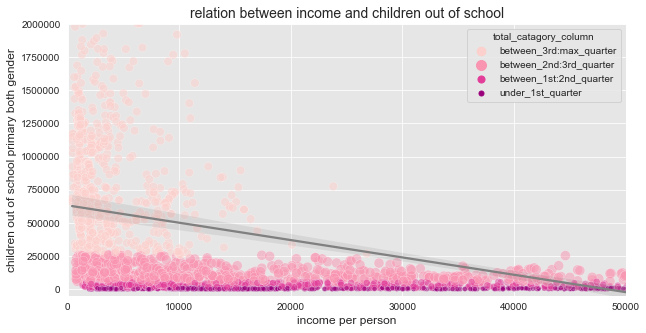

In [ ]:
df, x, y = income_out_school, 'income_per_person','total'
hue = "total_catagory_column"
size = "total_catagory_column"

title = "relation between income and children out of school"
xlab = "income per person"
ylab = "children out of school primary both gender"
hue_order = ["between_3rd:max_quarter","between_2nd:3rd_quarter","between_1st:2nd_quarter","under_1st_quarter"]

# ----------------------------------------------------------------

plt.figure(figsize=(10,5))

sns.scatterplot(data=df, x=x, y=y, hue=hue, size=size, palette="RdPu", hue_order=hue_order, sizes=(25,100), alpha=.5)
sns.regplot(df[x],df[y],scatter=False,color="gray")

plt.ticklabel_format(style='plain')
plt.ylim(-50000, 2000000)
plt.xlim(0, 50000)

plt.title(title,fontsize=14)
plt.xlabel(xlab, fontsize=12)
plt.ylabel(ylab, fontsize=12);



  >  From this visual, we can see the negative correlation between the number of children out of school primary and income. 
    

**Relation between child labor and children out of school**

In [ ]:
# merge child_labor and out_school files,  
# to visualize the correlation between child_labor, and
# the total number of children out-of-school.

labor_out_school = merge_files(child_labor, out_school, 'inner')
labor_out_school.head()


The files have been merged successfully.


,country_name,years,percentage_child_labor,country_code,cuntry_year_id,children_out_of_school_primary_female,children_out_of_school_primary_male,total
0,Kenya,1999,6.700000,KEN,KEN_1999,1020381,1045323,2065704
1,Morocco,1999,13.200000,MAR,MAR_1999,579272,306232,885504
2,Namibia,1999,15.438287,NAM,NAM_1999,17239,24967,42206
3,Nepal,1999,47.200000,NPL,NPL_1999,653202,405154,1058356
4,"Yemen, Rep.",1999,13.149970,YEM,YEM_1999,904826,456591,1361417


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


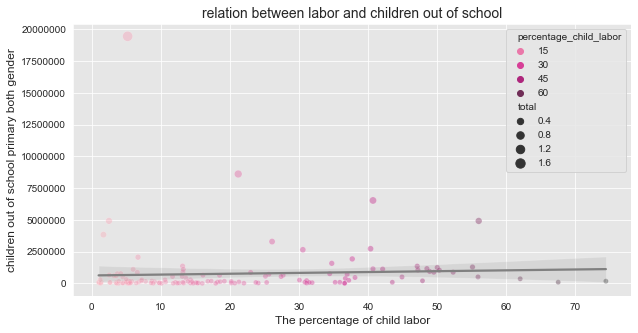

In [ ]:
df = labor_out_school
x ='percentage_child_labor'
y="total"

title="relation between labor and children out of school"
xlab="The percentage of child labor"
ylab="children out of school primary both gender"

xl = None
yl = None
scatter_visual(df, x, y, title, xlab, ylab, xl, yl )


> Here we can see the positive correlation between the number of children out of school and children labor.

### relation between unemployment with basic education and  children out of school

In [ ]:
labor_out_school.columns

Index(['country_name', 'years', 'percentage_child_labor', 'country_code',
       'cuntry_year_id', 'children_out_of_school_primary_female',
       'children_out_of_school_primary_male', 'total'],
      dtype='object')

In [ ]:
# merge unemp_basic_educ and out_school files,  
# to visualize the correlation between unemp_basic_educ, and
# the total number of children out-of-school.

unemp_basic_out_school = merge_files(unemp_basic_educ, out_school, 'inner')
unemp_basic_out_school.head()


The files have been merged successfully.


,country_name,years,unemp_basic_education,country_code,cuntry_year_id,children_out_of_school_primary_female,children_out_of_school_primary_male,total
0,Canada,1990,12.20,CAN,CAN_1990,42881,53084,95965
1,Indonesia,1990,1.89,IDN,IDN_1990,681490,304802,986292
2,Canada,1991,15.40,CAN,CAN_1991,20913,17551,38464
3,Switzerland,1991,2.23,CHE,CHE_1991,32728,36752,69480
4,Indonesia,1991,1.99,IDN,IDN_1991,797785,438234,1236019


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


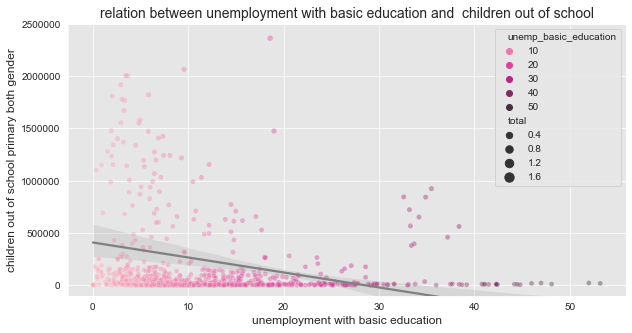

In [ ]:
df = unemp_basic_out_school
x ='unemp_basic_education'
y="total"

title="relation between unemployment with basic education and  children out of school"
xlab="unemployment with basic education"
ylab="children out of school primary both gender"

yl=[-100000, 2500000]
xl=None

scatter_visual(df, x, y, title, xlab, ylab, xl, yl)


> Here we can see the negative correlation between the number of children out of school primary and unemployment with basic education.

### relation between early marriage and number children out of school	

In [ ]:
# merge sp_women and out_school files,  
# to visualize the correlation between sp_women, and
# the total number of children out-of-school.

sp_women_out_school = merge_files(sp_women, out_school, 'inner')
sp_women_out_school.head()


The files have been merged successfully.


,country_name,years,women_FM15,country_code,cuntry_year_id,women_FM18,total_sp_women,children_out_of_school_primary_female,children_out_of_school_primary_male,total
0,Colombia,1986,4.3,COL,COL_1986,23.3,27.6,575648,630649,1206297
1,Senegal,1986,15.4,SEN,SEN_1986,58.8,74.2,335499,249924,585423
2,Burundi,1987,2.1,BDI,BDI_1987,17.3,19.4,227991,179917,407908
3,Indonesia,1987,11.3,IDN,IDN_1987,35.1,46.4,428882,64015,492897
4,Morocco,1987,6.5,MAR,MAR_1987,24.0,30.5,778112,451007,1229119


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


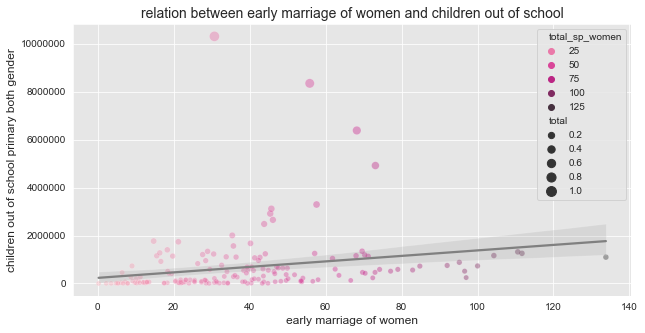

In [ ]:
df = sp_women_out_school
x ='total_sp_women'
y="total"

title="relation between early marriage of women and children out of school"
xlab="early marriage of women"
ylab="children out of school primary both gender"

xl = None
yl = None

scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> in this scatter plot we can see the positive correlation between the number of children out of school and early marriage of women.

### relation between average first marriage age for women and children out of school	

In [ ]:
# merge age_1st_marr_women and out_school files,  
# to visualize the correlation between age_1st_marr_women, and
# the total number of children out-of-school.

age_1st_marr_out_school = merge_files(age_1st_marr_women, out_school, 'inner')


The files have been merged successfully.


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


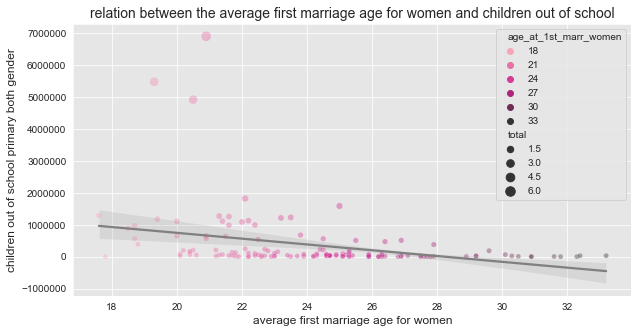

In [ ]:
df = age_1st_marr_out_school
x ='age_at_1st_marr_women'
y="total"

title="relation between the average first marriage age for women and children out of school"
xlab="average first marriage age for women"
ylab="children out of school primary both gender"

xl = None
yl = None

scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> Here is a negative correlation between the average first marriage age for women and the number of children out of school.

### Literacy rate and  children out of school

In [ ]:
# merge literacy and out_school files,  
# to visualize the correlation between literacy, and
# the total number of children out-of-school.

literacy_out_school = merge_files(literacy, out_school, 'inner')
literacy_out_school.head()


The files have been merged successfully.


,country_name,country_code,years,literacy_rate,cuntry_year_id,children_out_of_school_primary_female,children_out_of_school_primary_male,total
0,Kuwait,KWT,1975,59.564388,KWT_1975,19425,13062,32487
1,Cameroon,CMR,1976,41.216209,CMR_1976,228075,158444,386519
2,Eswatini,SWZ,1976,55.325039,SWZ_1976,16698,17698,34396
3,Rwanda,RWA,1978,38.243431,RWA_1978,178776,150450,329226
4,Jordan,JOR,1979,66.796806,JOR_1979,9555,2894,12449


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


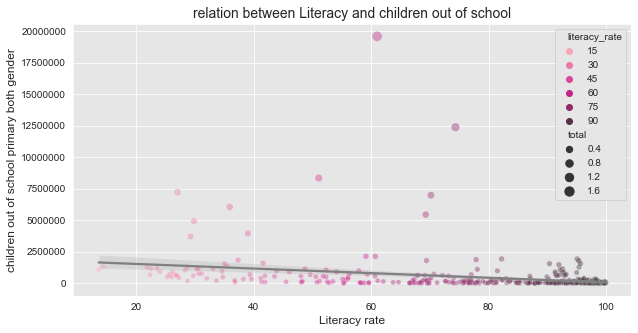

In [ ]:
df = literacy_out_school
x = 'literacy_rate'
y="total"

title="relation between Literacy and children out of school"
xlab="Literacy rate"
ylab="children out of school primary both gender"

xl = None
# yl = [-100000, 2500000]
yl = None
scatter_visual(df, x, y, title, xlab, ylab, xl, yl)



> the positive correlation between the number of children out of school and literacy rate.

### relation between income and percentage of working children

In [ ]:
# merge income and child_labor files,  
# to visualize the correlation between income, and child_labor

income_child_labor = merge_files(income, child_labor, 'inner')
income_child_labor.head()


The files have been merged successfully.


,country_name,years,income_per_person,country_code,cuntry_year_id,percentage_child_labor
0,Guinea,1994,1570.0,GIN,GIN_1994,48.3
1,Kazakhstan,1996,8730.0,KAZ,KAZ_1996,29.7
2,Mozambique,1996,506.0,MOZ,MOZ_1996,1.8
3,Kyrgyz Republic,1998,2890.0,KGZ,KGZ_1998,8.6
4,Kenya,1999,3260.0,KEN,KEN_1999,6.7


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


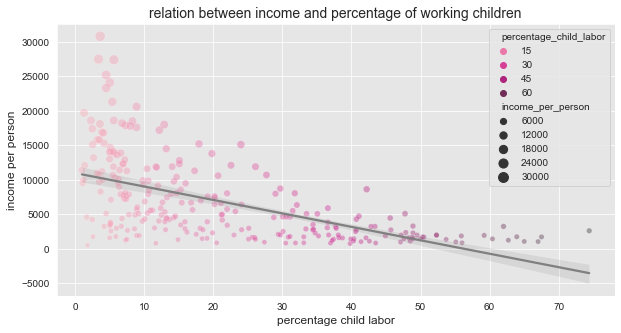

In [ ]:
df = income_child_labor
y = 'income_per_person'
x = 'percentage_child_labor'

title="relation between income and percentage of working children"
ylab="income per person"
xlab="percentage child labor"

xl = None
yl = None

scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> Here we can clearly see the negative correlation between income and the percentage of child labor.

### relation between income and marriage

In [ ]:
# merge income and sp_women files,  
# to visualize the correlation between income, and sp_women.

income_sp_women = merge_files(income, sp_women, 'inner')
income_sp_women.head()


The files have been merged successfully.


,country_name,years,income_per_person,country_code,cuntry_year_id,women_FM15,women_FM18,total_sp_women
0,El Salvador,1985,5040.0,SLV,SLV_1985,6.2,37.7,43.9
1,Brazil,1986,10900.0,BRA,BRA_1986,3.7,21.8,25.5
2,Colombia,1986,7710.0,COL,COL_1986,4.3,23.3,27.6
3,Dominican Republic,1986,5600.0,DOM,DOM_1986,10.4,34.4,44.8
4,Liberia,1986,1860.0,LBR,LBR_1986,16.6,48.4,65.0


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


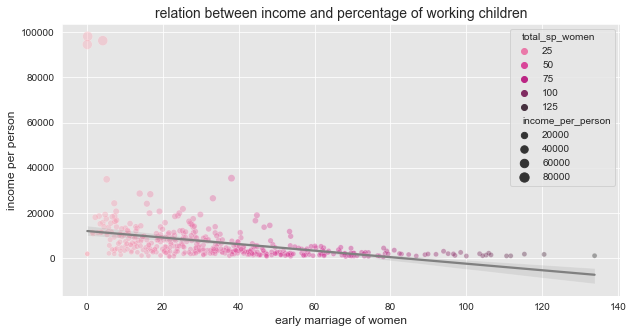

In [ ]:
df = income_sp_women
y ='income_per_person'
x="total_sp_women"

title = "relation between income and percentage of working children"
ylab  = "income per person"
xlab  = "early marriage of women"

xl = None
yl = None


scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> again the correlation is negative between income and early marriage of women.

### relation between income and the mean age of the first marriage for women

In [ ]:
# merge income and age_1st_marr_women files,  
# to visualize the correlation between income, and age_1st_marr_women.

income_age_1st_marr = merge_files(income, age_1st_marr_women, 'inner')
income_age_1st_marr.head()


The files have been merged successfully.


,country_name,years,income_per_person,country_code,cuntry_year_id,age_at_1st_marr_women
0,Australia,1960,16300.0,AUS,AUS_1960,21.6
1,Austria,1960,12100.0,AUT,AUT_1960,24.0
2,Belgium,1960,12900.0,BEL,BEL_1960,22.8
3,Bulgaria,1960,5400.0,BGR,BGR_1960,21.3
4,Brunei,1960,72200.0,NaN,NaN,19.7


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


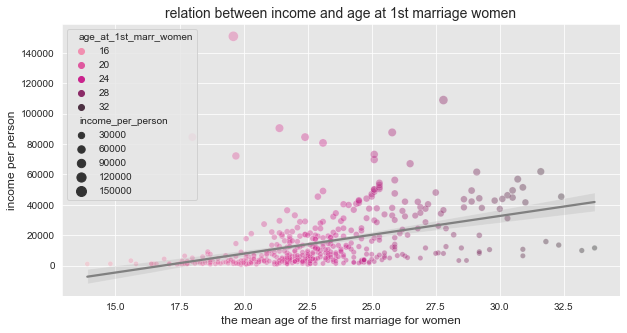

In [ ]:
df = income_age_1st_marr
y ='income_per_person'
x="age_at_1st_marr_women"

title="relation between income and age at 1st marriage women"
ylab="income per person"
xlab="the mean age of the first marriage for women"

xl = None
yl = None


scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> here we can see a positive correlation between income and average first marriage age for women.

### relation between income and literacy

In [ ]:
# merge income and literacy files,  
# to visualize the correlation between income, and literacy.

income_literacy_rate = merge_files(income, literacy, 'inner')
income_literacy_rate.head()


The files have been merged successfully.


,country_name,years,income_per_person,country_code,cuntry_year_id,literacy_rate
0,Barbados,1970,11600.0,BRB,BRB_1970,99.268082
1,Grenada,1970,2700.0,GRD,GRD_1970,97.794472
2,St. Vincent and the Grenadines,1970,3320.0,VCT,VCT_1970,95.632156
3,Somalia,1972,1420.0,SOM,SOM_1972,5.404650
4,United Arab Emirates,1975,84600.0,ARE,ARE_1975,53.514881


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


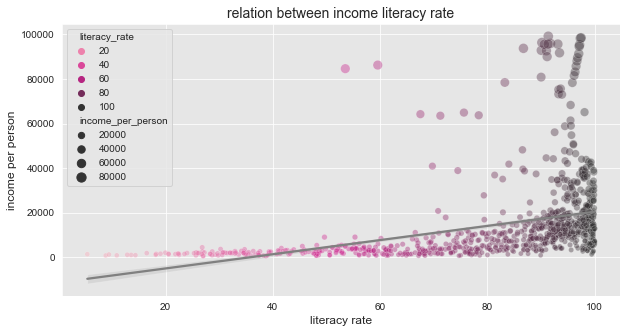

In [ ]:
df = income_literacy_rate
y ='income_per_person'
x="literacy_rate"

title="relation between income literacy rate"
ylab="income per person"
xlab="literacy rate"

xl = None
yl = None


scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> here we can see a positive correlation between income and literacy rate.

### relation betwee literacy and childrens labor


In [ ]:
# merge child_labor and literacy files,  
# to visualize the correlation between child_labor, and literacy.

literacy_child_labor = merge_files(literacy, child_labor, 'inner')
literacy_child_labor.head()


The files have been merged successfully.


,country_name,country_code,years,literacy_rate,cuntry_year_id,percentage_child_labor
0,Burundi,BDI,2000,59.303619,BDI_2000,36.96453
1,Bosnia and Herzegovina,BIH,2000,96.663101,BIH_2000,20.20000
2,Central African Republic,CAF,2000,50.645168,CAF_2000,67.00000
3,Cote d'Ivoire,CIV,2000,48.740761,CIV_2000,40.70000
4,"Gambia, The",GMB,2000,36.817730,GMB_2000,25.31456


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


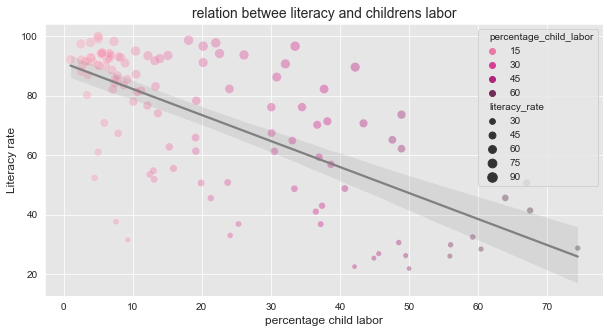

In [ ]:
df = literacy_child_labor
x='percentage_child_labor'
y="literacy_rate"

title="relation betwee literacy and childrens labor"
xlab="percentage child labor"
ylab="Literacy rate"

xl = None
yl = None


scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> here we can clearly see the nigative correlation between literacy and percentage child labor.

### relation betwee literacy and marriage


In [ ]:
# merge sp_women and literacy files,  
# to visualize the correlation between sp_women, and literacy.

literacy_sp_women = merge_files(literacy, sp_women, 'inner' )
literacy_sp_women.head()


The files have been merged successfully.


,country_name,country_code,years,literacy_rate,cuntry_year_id,women_FM15,women_FM18,total_sp_women
0,Mozambique,MOZ,1997,38.707878,MOZ_1997,21.5,56.6,78.1
1,Kazakhstan,KAZ,1999,99.512657,KAZ_1999,0.3,14.4,14.7
2,Rwanda,RWA,2000,64.888603,RWA_2000,2.1,19.5,21.6
3,Nicaragua,NIC,2001,76.677132,NIC_2001,13.3,43.3,56.6
4,Nepal,NPL,2001,48.608971,NPL_2001,14.1,56.1,70.2


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


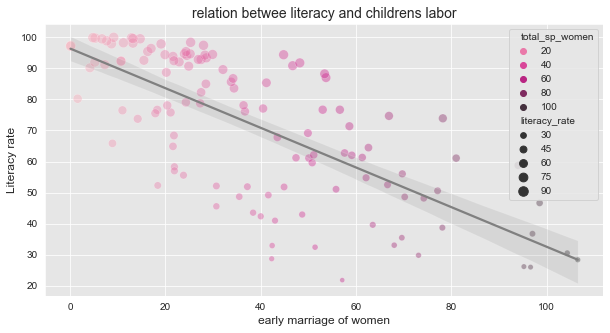

In [ ]:
df = literacy_sp_women
x= 'total_sp_women'
y= "literacy_rate"

title="relation betwee literacy and childrens labor"
xlab='early marriage of women'
ylab="Literacy rate"

xl = None
yl = None


scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> here we can clearly see the nigative correlation between literacy rate and early marriage of women.

### relation between literacy and the mean age of the first marriage for women

In [ ]:
# merge age_1st_marr_women and literacy files,  
# to visualize the correlation between age_1st_marr_women, and literacy.

literacy_age_1st_marr = merge_files(literacy, age_1st_marr_women, 'inner')
literacy_age_1st_marr.head()


The files have been merged successfully.


,country_name,country_code,years,literacy_rate,cuntry_year_id,age_at_1st_marr_women
0,Barbados,BRB,1970,99.268082,BRB_1970,28.5
1,St. Vincent and the Grenadines,VCT,1970,95.632156,VCT_1970,28.4
2,United Arab Emirates,ARE,1975,53.514881,ARE_1975,18.0
3,Burkina Faso,BFA,1975,8.830230,BFA_1975,17.4
4,Uruguay,URY,1975,93.861069,URY_1975,22.5


C:\Users\engAmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


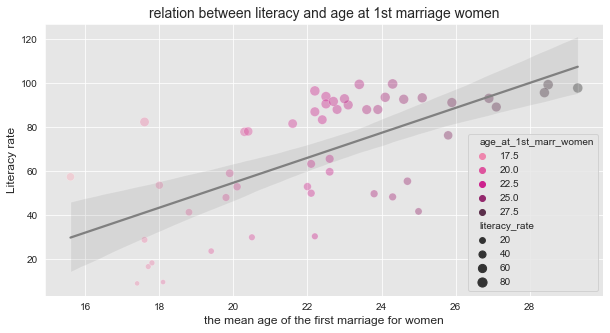

In [ ]:
df = literacy_age_1st_marr
x='age_at_1st_marr_women'
y="literacy_rate"

title="relation between literacy and age at 1st marriage women"
xlab="the mean age of the first marriage for women"
ylab="Literacy rate"

xl = None
yl = None


scatter_visual(df, x, y, title, xlab, ylab, xl, yl)

> this scatter plot shows us the positive correlation between literacy rate and average first marriage age for women.

### line charts

**Change in the number of out-of-school children and child labor over time**


In [ ]:
sns.set_style("white")

def line_visual(df, df2, lab1, lab2):
    """create a line plot with two axes each one for a variable."""
    
    ax = df.plot(x=df.index, y=df.values,  legend=False, color="pink")
    plt.ticklabel_format(style='plain', axis='y')
    
    ax2 = ax.twinx()
    df2.plot(x=df2.index, y=df2.values, ax=ax2, legend=False, color="gray")
    
    ax.figure.legend([lab1, lab2])

In [ ]:
def grouping_stat(df, col_groupby, col ):
    """
    to calculate the mean for column col_groupby for each value in column col
    args:
        df: data frame name 
        col_groupby: column to group by
        col: column to calculate mean for
      output: average for col for each value in column col_groupby
    """
    df = df.groupby(col_groupby)[col].mean()
    return df

In [ ]:
# create values that we will need to visualize a line plot 

mean_total_year = grouping_stat(labor_out_school, 'years', 'total')
mean_labor_year = grouping_stat(labor_out_school, 'years', 'percentage_child_labor')

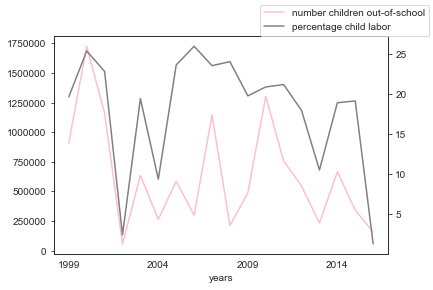

In [ ]:
df = mean_total_year
df2 = mean_labor_year
line_visual(df, df2, 'number children out-of-school', 'percentage child labor')

> over time each of the columns number of children out-of-school and the percentage of child labor change together in the increase and decrease.

In [ ]:
# create values that we will need to visualize a line plot 

mean_total_year = grouping_stat(sp_women_out_school, 'years', 'total')
sp_women_total_year = grouping_stat(sp_women_out_school, 'years', 'total_sp_women')

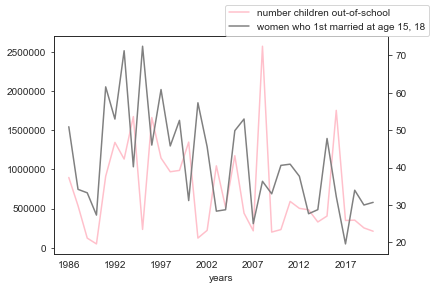

In [ ]:
df = mean_total_year
df2 = sp_women_total_year
line_visual(df, df2, 'number children out-of-school', 'women who 1st married at age 15, 18')

> over time each of the columns number of children out-of-school and percent of early marriage change together in the increase and decrease.

In [ ]:
# create values that we will need to visualize a line plot 

mean_total_year = grouping_stat(age_1st_marr_out_school, 'years', 'total')
mean_1st_marr_year = grouping_stat(age_1st_marr_out_school, 'years', 'age_at_1st_marr_women')

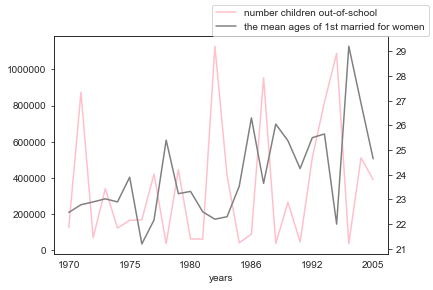

In [ ]:
df = mean_total_year
df2 = mean_1st_marr_year
line_visual(df, df2, 'number children out-of-school', 'the mean ages of 1st married for women')

> Over time, each column of the number of out-of-school children and the average age of first marriage for women. change opposite to each other.

In [ ]:
# create values that we will need to visualize a line plot 

mean_total_year = grouping_stat(unemp_basic_out_school, 'years', 'total')
mean_unemp_basic_educ_year = grouping_stat(unemp_basic_out_school, 'years', 'unemp_basic_education')

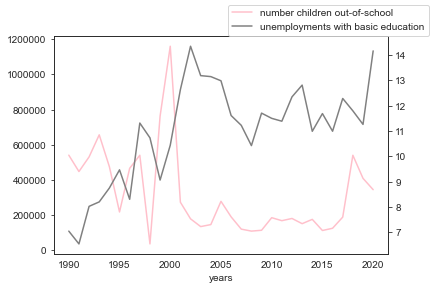

In [ ]:
df = mean_total_year
df2 = mean_unemp_basic_educ_year
line_visual(df, df2, 'number children out-of-school', 'unemployments with basic education')

> Over time, each column of the number of out-of-school children and unemployments with basic education. change opposite to each other

In [ ]:
# create values that we will need to visualize a line plot 

mean_total_year = grouping_stat(literacy_out_school, 'years', 'total')
mean_literacy_year = grouping_stat(literacy_out_school, 'years', 'literacy_rate')

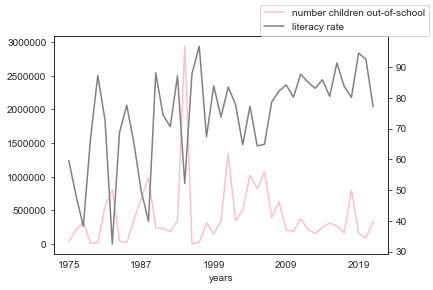

In [ ]:
df = mean_total_year
df2 = mean_literacy_year
line_visual(df, df2, 'number children out-of-school', 'literacy rate')

> Over time, each column of the number of out-of-school children and literacy rate. change opposite to each other.

In [ ]:
# create values that we will need to visualize a line plot 

mean_total_year = grouping_stat(income_out_school, 'years', 'total')
mean_income_year = grouping_stat(income_out_school, 'years', 'income_per_person')

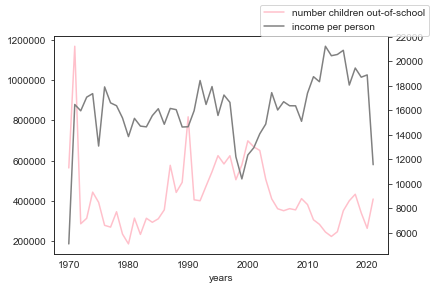

In [ ]:
df = mean_total_year
df2 = mean_income_year
line_visual(df, df2, 'number children out-of-school', 'income per person' )

> Over time, each column of the number of out-of-school children and income. change opposite to each other.

[GO UP](#out-of-school-reasons-and-impact)